In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  
import clamped_beam_wod as cbe
import sys

import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from keras.optimizers import Adam, SGD
from flexmbd.utils import rot

from random import randint
import tensorflow as tf


In [2]:
### For better gpu usage ###

configuration = tf.compat.v1.ConfigProto()
configuration.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=configuration)

In [3]:
## Function for dataframes ##

def dframefunc(force):
    
    ### Values for dataset creation, only force differs on each set###

    n_elem = 40
    l = 1
    h = 0.02
    E = 2e11
    nu = 0.3
    rho = 7801
    Fy = force
    f_array = []
    
    
    vals = cbe.generate(n_elem, l, h, E, nu, rho, Fy) ## Generating data
    
    
    a_length = len(vals[0][0]) +1 ## Lenght for force array


    for i in range(1, a_length): ## Creating force array
        f_array.append(Fy)
    
    
    dframe = pd.DataFrame()
    
    for i in range(len(vals[0])): ## Creating the dataframe out of generated data
        dframe[i] = pd.DataFrame(vals[0][i])
    
    dframe[50] = f_array ## adding force 1 to dframe

    return [dframe, vals[2], vals[1]]

FEM: end displacement is 25 mm, rotation 2.149 deg
MBD: end displacement is 24.966 mm, rotation 2.146 deg
10001
FEM: end displacement is 62.5 mm, rotation 5.371 deg
MBD: end displacement is 61.972 mm, rotation 5.335 deg
10001
FEM: end displacement is 100 mm, rotation 8.594 deg
MBD: end displacement is 97.899 mm, rotation 8.449 deg
10001
FEM: end displacement is 125 mm, rotation 10.74 deg
MBD: end displacement is 121 mm, rotation 10.47 deg
10001
Generating datasets done!


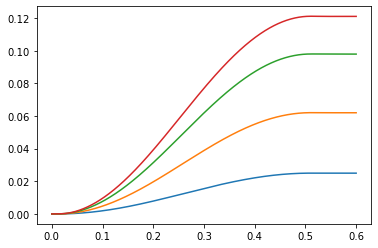

In [4]:
## Generating dataframes for model ##
dframe0 = dframefunc(200)[0]
dframe1 = dframefunc(500)[0]     
dframe2 = dframefunc(800)[0]
dframe3 = dframefunc(1000)[0]
print ( "Generating datasets done!" )

In [5]:
## Combining the dataframes and sifting ##

combined_valsX = pd.concat([dframe1.iloc[:-1], dframe2.iloc[:-1], dframe3.iloc[:-1], dframe0.iloc[:-1]]) ## drop the last for every simulation set as combining them
combined_valsY = pd.concat([dframe1.iloc[1: , :] , dframe2.iloc[1: , :], dframe3.iloc[1: , :], dframe0.iloc[1: , :]]) ## drop the first for every simulation set as combining them

## Inputs and outputs ##
X = combined_valsX
Y = combined_valsY
 

In [6]:
### CUSTOM LOSS FUNCTION ###

### using keras as backed for loss function ###

def custom_loss(y_true, y_pred):
    
    loss = K.square(y_pred - y_true) 
    loss = loss * 0.4
    
    
    return loss

In [220]:
### CREATING NN MODEL ###

model=Sequential([Dense(51,input_shape=(51,), activation="relu"),
                  Dense(64,activation="relu"),
                  Dense(64,activation="relu"),
                  Dense(51)])

model.compile(Adam(lr=0.00001),loss=tf.keras.losses.MeanSquaredError())

In [ ]:
###TRAINING OF MODEL ###

history = model.fit(X, Y, epochs=1000, validation_split = 0.1, batch_size=32)

##callbacks= [keras.callbacks.EarlyStopping(patience=30)],

Epoch 1/1000
1125/1125 [==============================] - 1s 670us/step - loss: 10307.3174 - val_loss: 641.0599
Epoch 2/1000
1125/1125 [==============================] - 1s 687us/step - loss: 6732.0518 - val_loss: 352.9230
Epoch 3/1000
1125/1125 [==============================] - 1s 733us/step - loss: 2632.5173 - val_loss: 67.0143
Epoch 4/1000
1125/1125 [==============================] - 1s 663us/step - loss: 261.3134 - val_loss: 0.5531
Epoch 5/1000
1125/1125 [==============================] - 1s 687us/step - loss: 1.0588 - val_loss: 0.0322
Epoch 6/1000
1125/1125 [==============================] - 1s 727us/step - loss: 0.0091 - val_loss: 0.0318
Epoch 7/1000
1125/1125 [==============================] - 1s 697us/step - loss: 0.0089 - val_loss: 0.0309
Epoch 8/1000
1125/1125 [==============================] - 1s 728us/step - loss: 0.0087 - val_loss: 0.0303
Epoch 9/1000
1125/1125 [==============================] - 1s 737us/step - loss: 0.0085 - val_loss: 0.0295
Epoch 10/1000
1125/1125 [====

1125/1125 [==============================] - 1s 694us/step - loss: 1.8000e-04 - val_loss: 3.7666e-05
Epoch 74/1000
1125/1125 [==============================] - 1s 727us/step - loss: 1.8320e-04 - val_loss: 2.7268e-05
Epoch 75/1000
1125/1125 [==============================] - 1s 696us/step - loss: 1.8853e-04 - val_loss: 1.9218e-05
Epoch 76/1000
1125/1125 [==============================] - 1s 684us/step - loss: 1.7096e-04 - val_loss: 1.7152e-05
Epoch 77/1000
1125/1125 [==============================] - 1s 755us/step - loss: 1.7254e-04 - val_loss: 2.5152e-05
Epoch 78/1000
1125/1125 [==============================] - 1s 669us/step - loss: 1.7070e-04 - val_loss: 2.3339e-05
Epoch 79/1000
1125/1125 [==============================] - 1s 672us/step - loss: 1.7339e-04 - val_loss: 1.6842e-05
Epoch 80/1000
1125/1125 [==============================] - 1s 791us/step - loss: 1.6119e-04 - val_loss: 1.8284e-05
Epoch 81/1000
1125/1125 [==============================] - 1s 728us/step - loss: 1.5950e-04 - 

1125/1125 [==============================] - 1s 614us/step - loss: 2.9863e-05 - val_loss: 2.4401e-06
Epoch 144/1000
1125/1125 [==============================] - 1s 626us/step - loss: 3.5576e-05 - val_loss: 2.7880e-06
Epoch 145/1000
1125/1125 [==============================] - 1s 654us/step - loss: 3.5497e-05 - val_loss: 1.9166e-06
Epoch 146/1000
1125/1125 [==============================] - 1s 635us/step - loss: 2.3794e-05 - val_loss: 9.0041e-06
Epoch 147/1000
1125/1125 [==============================] - 1s 631us/step - loss: 5.8508e-05 - val_loss: 3.6504e-06
Epoch 148/1000
1125/1125 [==============================] - 1s 616us/step - loss: 2.0260e-05 - val_loss: 3.0331e-06
Epoch 149/1000
1125/1125 [==============================] - 1s 599us/step - loss: 2.7987e-05 - val_loss: 4.8472e-06
Epoch 150/1000
1125/1125 [==============================] - 1s 582us/step - loss: 2.7459e-05 - val_loss: 2.6706e-06
Epoch 151/1000
1125/1125 [==============================] - 1s 619us/step - loss: 3.098

Epoch 214/1000
1125/1125 [==============================] - 1s 582us/step - loss: 3.1785e-05 - val_loss: 3.2661e-06
Epoch 215/1000
1125/1125 [==============================] - 1s 636us/step - loss: 2.9512e-05 - val_loss: 1.7567e-06
Epoch 216/1000
1125/1125 [==============================] - 1s 632us/step - loss: 2.7243e-05 - val_loss: 2.5491e-06
Epoch 217/1000
1125/1125 [==============================] - 1s 622us/step - loss: 3.1742e-05 - val_loss: 2.4797e-06
Epoch 218/1000
1125/1125 [==============================] - 1s 594us/step - loss: 2.9077e-05 - val_loss: 2.2006e-06
Epoch 219/1000
1125/1125 [==============================] - 1s 604us/step - loss: 3.0437e-05 - val_loss: 2.6856e-06
Epoch 220/1000
1125/1125 [==============================] - 1s 612us/step - loss: 3.0210e-05 - val_loss: 6.4958e-06
Epoch 221/1000
1125/1125 [==============================] - 1s 627us/step - loss: 4.0938e-05 - val_loss: 2.8582e-06
Epoch 222/1000
1125/1125 [==============================] - 1s 631us/ste

1125/1125 [==============================] - 1s 641us/step - loss: 3.3736e-05 - val_loss: 2.6380e-06
Epoch 285/1000
1125/1125 [==============================] - 1s 646us/step - loss: 2.6603e-05 - val_loss: 1.3861e-06
Epoch 286/1000
1125/1125 [==============================] - 1s 632us/step - loss: 3.2461e-05 - val_loss: 3.1229e-06
Epoch 287/1000
1125/1125 [==============================] - 1s 616us/step - loss: 2.2693e-05 - val_loss: 4.0120e-06
Epoch 288/1000
1125/1125 [==============================] - 1s 568us/step - loss: 3.0638e-05 - val_loss: 2.6858e-06
Epoch 289/1000
1125/1125 [==============================] - 1s 670us/step - loss: 3.4151e-05 - val_loss: 3.0893e-06
Epoch 290/1000
1125/1125 [==============================] - 1s 637us/step - loss: 2.6383e-05 - val_loss: 3.0773e-06
Epoch 291/1000
1125/1125 [==============================] - 1s 643us/step - loss: 4.0807e-05 - val_loss: 1.7994e-06
Epoch 292/1000
1125/1125 [==============================] - 1s 626us/step - loss: 2.419

Epoch 355/1000
1125/1125 [==============================] - 1s 601us/step - loss: 3.1332e-05 - val_loss: 2.4249e-06
Epoch 356/1000
1125/1125 [==============================] - 1s 605us/step - loss: 3.2027e-05 - val_loss: 1.7627e-06
Epoch 357/1000
1125/1125 [==============================] - 1s 591us/step - loss: 2.7877e-05 - val_loss: 2.2986e-06
Epoch 358/1000
1125/1125 [==============================] - 1s 624us/step - loss: 3.5170e-05 - val_loss: 1.7125e-06
Epoch 359/1000
1125/1125 [==============================] - 1s 622us/step - loss: 3.4233e-05 - val_loss: 1.1596e-05
Epoch 360/1000
1125/1125 [==============================] - 1s 649us/step - loss: 2.4513e-05 - val_loss: 1.6788e-06
Epoch 361/1000
1125/1125 [==============================] - 1s 627us/step - loss: 2.6666e-05 - val_loss: 1.7898e-06
Epoch 362/1000
1125/1125 [==============================] - 1s 643us/step - loss: 2.9105e-05 - val_loss: 1.8490e-06
Epoch 363/1000
1125/1125 [==============================] - 1s 636us/ste

1125/1125 [==============================] - 1s 596us/step - loss: 3.6539e-05 - val_loss: 1.5069e-06
Epoch 426/1000
1125/1125 [==============================] - 1s 619us/step - loss: 2.3378e-05 - val_loss: 3.0756e-06
Epoch 427/1000
1125/1125 [==============================] - 1s 580us/step - loss: 2.6701e-05 - val_loss: 1.2670e-06
Epoch 428/1000
1125/1125 [==============================] - 1s 627us/step - loss: 2.5894e-05 - val_loss: 7.5437e-07
Epoch 429/1000
1125/1125 [==============================] - 1s 585us/step - loss: 2.7441e-05 - val_loss: 1.3339e-06
Epoch 430/1000
1125/1125 [==============================] - 1s 653us/step - loss: 2.9991e-05 - val_loss: 2.2573e-06
Epoch 431/1000
1125/1125 [==============================] - 1s 660us/step - loss: 2.6128e-05 - val_loss: 2.1551e-06
Epoch 432/1000
1125/1125 [==============================] - 1s 607us/step - loss: 3.2501e-05 - val_loss: 1.7520e-06
Epoch 433/1000
1125/1125 [==============================] - 1s 593us/step - loss: 2.635

1125/1125 [==============================] - 1s 674us/step - loss: 3.2393e-05 - val_loss: 1.1394e-06
Epoch 496/1000
1125/1125 [==============================] - 1s 665us/step - loss: 2.4885e-05 - val_loss: 1.3984e-06
Epoch 497/1000
1125/1125 [==============================] - 1s 623us/step - loss: 2.7884e-05 - val_loss: 1.1683e-06
Epoch 498/1000
1125/1125 [==============================] - 1s 600us/step - loss: 2.7025e-05 - val_loss: 1.4603e-06
Epoch 499/1000
1125/1125 [==============================] - 1s 597us/step - loss: 2.5503e-05 - val_loss: 1.6962e-06
Epoch 500/1000
1125/1125 [==============================] - 1s 589us/step - loss: 2.9029e-05 - val_loss: 3.8479e-06
Epoch 501/1000
1125/1125 [==============================] - 1s 632us/step - loss: 2.9094e-05 - val_loss: 1.8204e-06
Epoch 502/1000
1125/1125 [==============================] - 1s 586us/step - loss: 2.4253e-05 - val_loss: 1.6811e-06
Epoch 503/1000
1125/1125 [==============================] - 1s 645us/step - loss: 2.544

Epoch 566/1000
1125/1125 [==============================] - 1s 646us/step - loss: 2.1265e-05 - val_loss: 1.3566e-06
Epoch 567/1000
1125/1125 [==============================] - 1s 599us/step - loss: 2.7731e-05 - val_loss: 8.6074e-07
Epoch 568/1000
1125/1125 [==============================] - 1s 601us/step - loss: 2.4957e-05 - val_loss: 8.2141e-07
Epoch 569/1000
1125/1125 [==============================] - 1s 644us/step - loss: 2.6736e-05 - val_loss: 1.1504e-06
Epoch 570/1000
1125/1125 [==============================] - 1s 575us/step - loss: 2.5238e-05 - val_loss: 1.0261e-06
Epoch 571/1000
1125/1125 [==============================] - 1s 627us/step - loss: 2.8031e-05 - val_loss: 1.9169e-06
Epoch 572/1000
1125/1125 [==============================] - 1s 623us/step - loss: 2.6102e-05 - val_loss: 1.4174e-06
Epoch 573/1000
1125/1125 [==============================] - 1s 592us/step - loss: 2.2259e-05 - val_loss: 9.1302e-07
Epoch 574/1000
1125/1125 [==============================] - 1s 618us/ste

1125/1125 [==============================] - 1s 677us/step - loss: 2.0280e-05 - val_loss: 5.7309e-06
Epoch 637/1000
1125/1125 [==============================] - 1s 677us/step - loss: 2.3892e-05 - val_loss: 1.3297e-05
Epoch 638/1000
1125/1125 [==============================] - 1s 716us/step - loss: 3.5753e-05 - val_loss: 8.5233e-07
Epoch 639/1000
1125/1125 [==============================] - 1s 682us/step - loss: 1.6987e-05 - val_loss: 1.9463e-06
Epoch 640/1000
1125/1125 [==============================] - 1s 722us/step - loss: 2.3285e-05 - val_loss: 7.3708e-07
Epoch 641/1000
1125/1125 [==============================] - 1s 651us/step - loss: 2.7538e-05 - val_loss: 2.0601e-06
Epoch 642/1000
1125/1125 [==============================] - 1s 656us/step - loss: 2.4379e-05 - val_loss: 2.1727e-06
Epoch 643/1000
1125/1125 [==============================] - 1s 592us/step - loss: 2.7551e-05 - val_loss: 1.5787e-06
Epoch 644/1000
1125/1125 [==============================] - 1s 668us/step - loss: 2.185

Epoch 707/1000
1125/1125 [==============================] - 1s 691us/step - loss: 2.2666e-05 - val_loss: 6.3306e-07
Epoch 708/1000
1125/1125 [==============================] - 1s 633us/step - loss: 3.1483e-05 - val_loss: 7.2918e-07
Epoch 709/1000
1125/1125 [==============================] - 1s 734us/step - loss: 2.2927e-05 - val_loss: 6.7215e-07
Epoch 710/1000
1125/1125 [==============================] - 1s 659us/step - loss: 2.9712e-05 - val_loss: 8.4507e-07
Epoch 711/1000
1125/1125 [==============================] - 1s 629us/step - loss: 2.2632e-05 - val_loss: 9.6752e-07
Epoch 712/1000
1125/1125 [==============================] - 1s 641us/step - loss: 2.6879e-05 - val_loss: 6.4705e-06
Epoch 713/1000
1125/1125 [==============================] - 1s 634us/step - loss: 2.5861e-05 - val_loss: 5.3099e-07
Epoch 714/1000
1125/1125 [==============================] - 1s 604us/step - loss: 2.7899e-05 - val_loss: 6.4639e-07
Epoch 715/1000
1125/1125 [==============================] - 1s 630us/ste

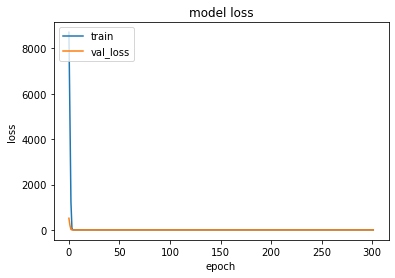

In [215]:
## Losses plotted ##

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'], loc='upper left')
plt.show()

FEM: end displacement is 75 mm, rotation 6.446 deg
MBD: end displacement is 74.095 mm, rotation 6.383 deg
10001


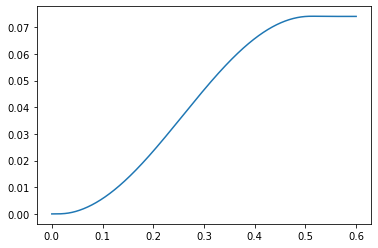

In [203]:
### Creating testing data ###
# Values are same as before except the Fy force #
    
dframe3, timeframe, sid = dframefunc(600)

X2 = dframe3.iloc[:-1]
Y2 = dframe3.iloc[1: , :]

In [216]:
#### Test ####
#np.set_printoptions(threshold=sys.maxsize)

results = model.evaluate(X, Y)
print(results)


xr = np.transpose(model.predict(np.array(X2)))
xr = xr[:-1] ##Deleting force array

1250/1250 [==============================] - 1s 409us/step - loss: 1.4212e-05
1.4211746929504443e-05


In [217]:
### Calculating the displacements ###

test_vals = X2.T[:-1].to_numpy() ## Creating numpy array from testdata so we can calculate results ##

    # Real results #
    
ny = test_vals.shape[0] // 2 + 1
r_end = np.empty((3, test_vals.shape[1]))

for i in range(test_vals.shape[1]):
    u_last = sid.nodes[-1].origin @ test_vals[14:ny, i]
    A_fb = rot(test_vals[10:14, i])
    r_fb = test_vals[7:10, i]
    r = r_fb + A_fb @ u_last
    r_end[:, i] = r

    
    # Simulated results #

ny2 = xr.shape[0] // 2 + 1 ## +1?
r_end2 = np.empty((3, xr.shape[1]))

for i in range(xr.shape[1]):
    u_last2 = sid.nodes[-1].origin @ xr[14:ny2, i]
    A_fb2 = rot(xr[10:14, i])
    r_fb2 = xr[7:10, i]
    r2 = r_fb2 + A_fb2 @ u_last2
    r_end2[:, i] = r2


In [218]:
print (test_vals - xr)

[[-0.00109376 -0.00109376 -0.00109376 ...  0.00303176  0.00303176
   0.00303176]
 [ 0.00095548  0.00095548  0.00095548 ...  0.00263137  0.00263137
   0.00263137]
 [-0.00251766 -0.00251766 -0.00251766 ... -0.00288834 -0.00288834
  -0.00288834]
 ...
 [-0.00072339 -0.00072339 -0.00072339 ...  0.0034508   0.0034508
   0.0034508 ]
 [ 0.00041604  0.00041604  0.00041604 ...  0.00456629  0.00456629
   0.00456629]
 [ 0.00146993  0.00146993  0.00146993 ... -0.00174396 -0.00174396
  -0.00174396]]


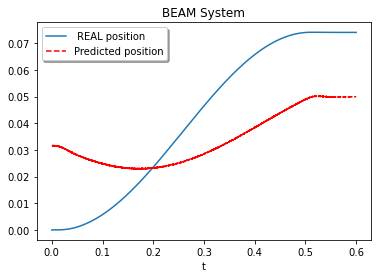

In [219]:
plt.plot(timeframe[:-1], r_end[1]) ## Timeframe is beign adjusted to sifting here
plt.plot(timeframe[:-1], r_end2[1], linestyle='dashed', color='red') ## Predicted position

plt.xlabel('t')
plt.legend([' REAL position',  'Predicted position'], shadow=True)
plt.title('BEAM System')
plt.show()